# PGD Attack

[Madry et al, “Towards Deep Learning Models Resistant to Adversarial Attacks”](https://arxiv.org/abs/1706.06083).

# 1. 事前準備

## 必要なライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution() # Eager Execution を無効にする

# ART 関連
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import KerasClassifier

## MNIST 用のモデルをロード

In [2]:
model = keras.models.load_model('../../models/mnist.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## MNIST データの取得

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

## オリジナル画像の取得

In [4]:
original_images = X_test[0:2]

## オリジナル画像の分類結果とスコアの取得

In [5]:
Y_hat = model.predict(original_images) # 推論結果
original_classes = np.argmax(Y_hat, axis=1) # 分類結果
original_scores = np.max(Y_hat, axis=1) # スコア

## オリジナル画像の表示

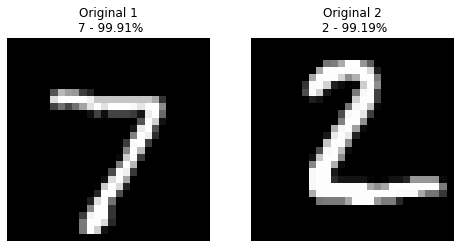

In [6]:
plt.figure(figsize=(8, 8))

# オリジナル画像1 を表示
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original 1\n {0} - {1:.2f}%'.format(original_classes[0], original_scores[0] * 100))
plt.imshow(original_images[0], cmap=plt.cm.gray)

# オリジナル画像2 を表示
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Original 2\n {0} - {1:.2f}%'.format(original_classes[1], original_scores[1] * 100))
plt.imshow(original_images[1], cmap=plt.cm.gray)

# 2. ART を利用した PGD Attack

## ART 用の classifier を生成

In [7]:
classifier = KerasClassifier(model=model, clip_values=(0, 1))

## PGD のインスタンスを生成

In [72]:
attack = ProjectedGradientDescent(classifier, eps=0.1, eps_step=0.005, max_iter=40, batch_size=2)

## 敵対的サンプルを生成

In [73]:
adv_images = attack.generate(original_images)

## 敵対的サンプルの分類結果、スコア、Linf を取得

In [74]:
Y_hat = model.predict(adv_images) # 推論結果
adv_classes = np.argmax(Y_hat, axis=1) # 分類結果
adv_scores = np.max(Y_hat, axis=1) # スコア
Linfs= np.linalg.norm((adv_images - original_images).reshape(-1, 28*28), ord=np.inf, axis=1) # Linf
print(adv_scores) # [0.96208733 0.98961616]

[0.96208733 0.98961616]


## 敵対的サンプルを表示

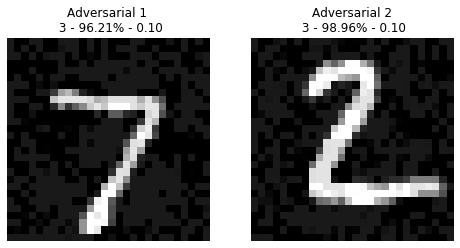

In [71]:
plt.figure(figsize=(8, 8))

# 敵対的サンプル1 を表示
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Adversarial 1 \n {0} - {1:.2f}% - {2:.2f}'.format(adv_classes[0], adv_scores[0] * 100, Linfs[0]))
plt.imshow(adv_images[0], cmap=plt.cm.gray)

# 敵対的サンプル2 を表示
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Adversarial 2\n {0} - {1:.2f}% - {2:.2f}'.format(adv_classes[1], adv_scores[1] * 100,  Linfs[1]))
plt.imshow(adv_images[1], cmap=plt.cm.gray)

## オリジナル画像と敵対的サンプルを表示（cmap=plt.cm.binary）

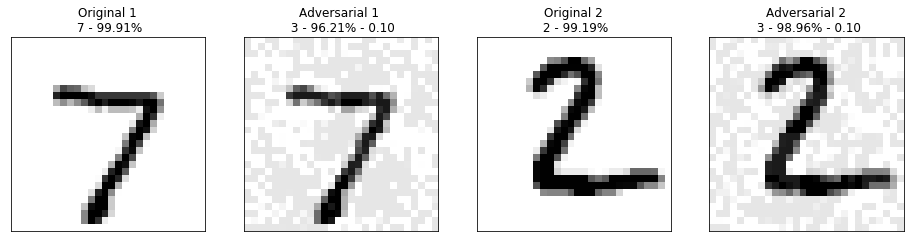

In [12]:
plt.figure(figsize=(16, 16))

# オリジナル画像1 を表示
plt.subplot(1, 4, 1)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.title('Original 1\n {0} - {1:.2f}%'.format(original_classes[0], original_scores[0] * 100))
plt.imshow(original_images[0], cmap=plt.cm.binary)

# 敵対的サンプル1 を表示
plt.subplot(1, 4, 2)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.title('Adversarial 1 \n {0} - {1:.2f}% - {2:.2f}'.format(adv_classes[0], adv_scores[0] * 100, Linfs[0]))
plt.imshow(adv_images[0], cmap=plt.cm.binary)

# オリジナル画像2 を表示
plt.subplot(1, 4, 3)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.title('Original 2\n {0} - {1:.2f}%'.format(original_classes[1], original_scores[1] * 100))
plt.imshow(original_images[1], cmap=plt.cm.binary)

# 敵対的サンプル2 を表示
plt.subplot(1, 4, 4)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.title('Adversarial 2\n {0} - {1:.2f}% - {2:.2f}'.format(adv_classes[1], adv_scores[1] * 100,  Linfs[1]))
plt.imshow(adv_images[1], cmap=plt.cm.binary)